# Nuclear RNAs

In [22]:
import scanpy as sc
import pandas as pd
import scipy.sparse as sp
import scipy
import numpy as np
from pyannotables import tables
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sc.settings.verbosity = 'info'
sc.set_figure_params(dpi=100)

## Read MTX files

### Allen Cells

In [9]:
adata = sc.read_mtx('data/allen.mtx')
genes = pd.read_csv('data/allen-genes.csv')['x']
barcodes = pd.read_csv('data/allen-barcodes.csv')['x']

adata = adata.T

adata.var_names = genes.values
adata.obs_names = barcodes.values

adata.write('data/allen.h5ad')

adata

In [3]:
adata = sc.read('data/allen.h5ad')
adata

AnnData object with n_obs × n_vars = 50000 × 27998 

In [4]:
sc.pp.filter_cells(adata, min_counts=1)
sc.pp.filter_genes(adata, min_counts=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

adata.raw = adata
adata

filtered out 7124 genes that are detected in less than 1 counts


AnnData object with n_obs × n_vars = 50000 × 20874 
    obs: 'n_counts'
    var: 'n_counts'

In [5]:
%%time

sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.tl.rank_genes_groups(adata, 'leiden', n_genes=adata.n_vars)

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:03.48)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:21.20)
computing UMAP
    using 'X_pca' with n_pcs = 50
    finished (0:00:40.24)
running Leiden clustering


... storing 'leiden' as categorical


    finished (0:00:16.52)
ranking genes
    finished (0:01:19.99)
CPU times: user 2min 30s, sys: 40.4 s, total: 3min 11s
Wall time: 2min 46s


In [6]:
adata.write('data/allen-processed.h5ad')

... storing 'leiden' as categorical


In [24]:
adata = sc.read('data/allen-processed.h5ad')
adata

AnnData object with n_obs × n_vars = 50000 × 20874 
    obs: 'n_counts', 'leiden'
    var: 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

... storing 'leiden' as categorical


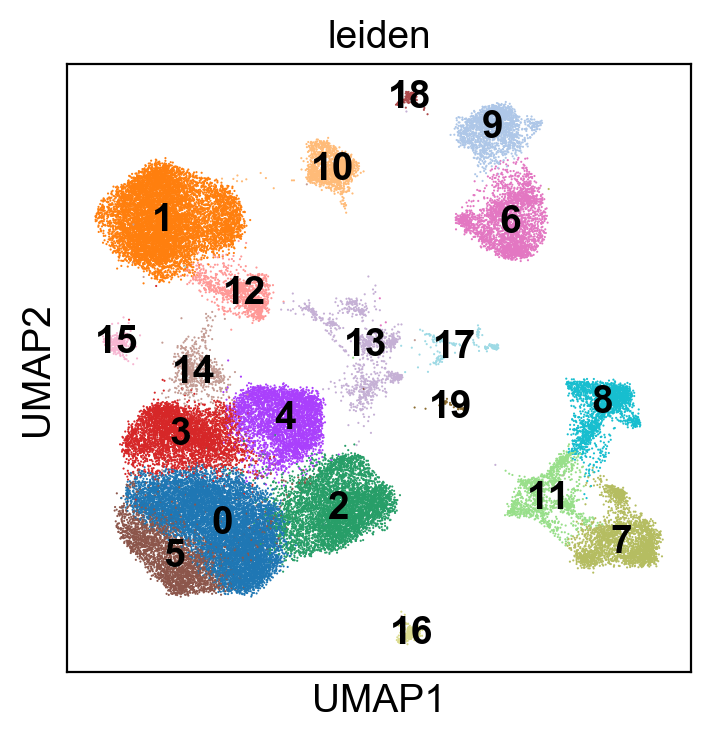

In [25]:
sc.pl.umap(adata, color='leiden', legend_loc='on data')

... storing 'leiden' as categorical


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


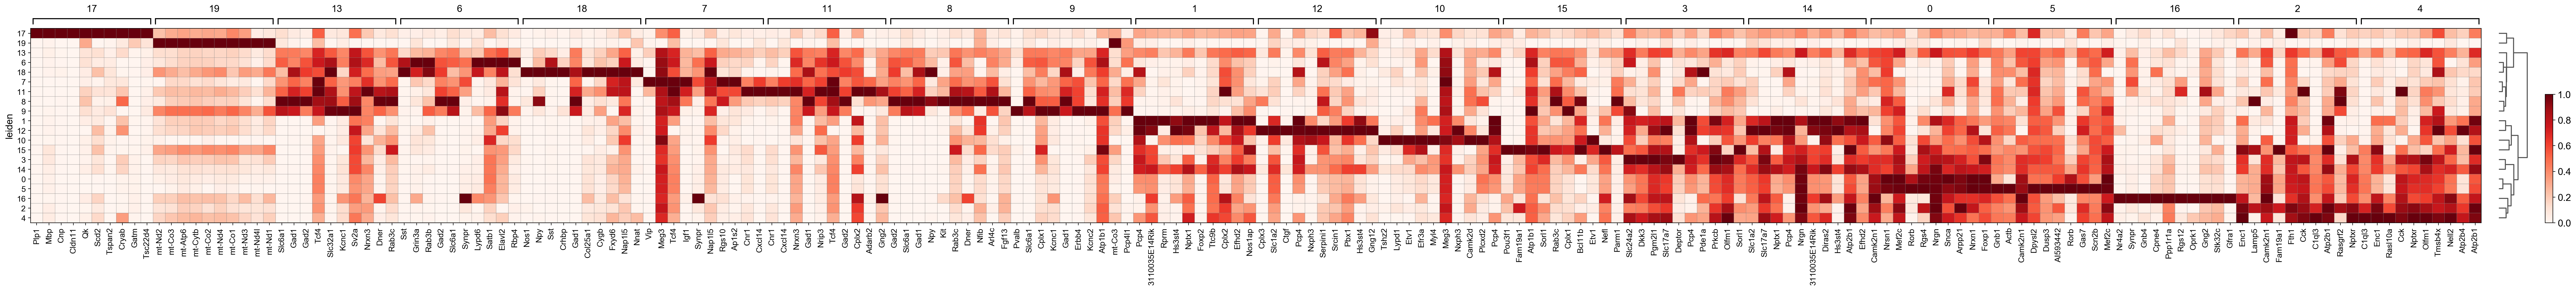

In [26]:
sc.pl.rank_genes_groups_matrixplot(adata, standard_scale='var', cmap='Reds')

### Macosko nuclei

In [19]:
adata_nuc = sc.read('data/macosko.csv')
adata_nuc.X = sp.csr_matrix(adata_nuc.X)

adata_nuc = adata_nuc.T
genes = pd.read_csv('data/macosko-genes.csv')['x']
adata_nuc.var_names = genes.values

adata_nuc.write('data/macosko.h5ad')

In [11]:
adata_nuc = sc.read('data/macosko.h5ad')
adata_nuc

AnnData object with n_obs × n_vars = 50000 × 27877 

In [12]:
sc.pp.filter_cells(adata_nuc, min_counts=1)
sc.pp.filter_genes(adata_nuc, min_counts=1)

sc.pp.normalize_total(adata_nuc)
sc.pp.log1p(adata_nuc)

adata_nuc.raw = adata_nuc
adata_nuc

filtered out 4876 genes that are detected in less than 1 counts


AnnData object with n_obs × n_vars = 50000 × 23001 
    obs: 'n_counts'
    var: 'n_counts'

In [13]:
%%time

sc.pp.highly_variable_genes(adata_nuc)
sc.pp.pca(adata_nuc)
sc.pp.neighbors(adata_nuc)
sc.tl.umap(adata_nuc)
sc.tl.leiden(adata_nuc)
sc.tl.rank_genes_groups(adata_nuc, 'leiden', n_genes=adata_nuc.n_vars)

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:04.93)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:16.21)
computing UMAP
    using 'X_pca' with n_pcs = 50
    finished (0:00:38.92)
running Leiden clustering


... storing 'leiden' as categorical


    finished (0:00:19.02)
ranking genes
    finished (0:01:11.17)
CPU times: user 2min 23s, sys: 39.4 s, total: 3min 3s
Wall time: 2min 36s


In [14]:
adata_nuc.write('data/macosko-processed.h5ad')

... storing 'leiden' as categorical


In [27]:
adata_nuc = sc.read('data/macosko-processed.h5ad')
adata_nuc

AnnData object with n_obs × n_vars = 50000 × 23001 
    obs: 'n_counts', 'leiden'
    var: 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

... storing 'leiden' as categorical


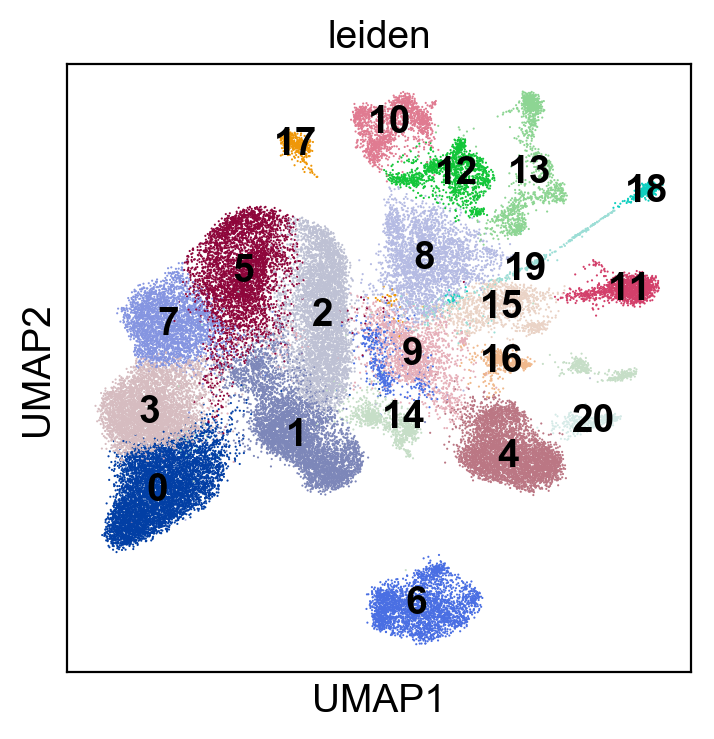

In [28]:
sc.pl.umap(adata_nuc, color='leiden', legend_loc='on data')

... storing 'leiden' as categorical


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


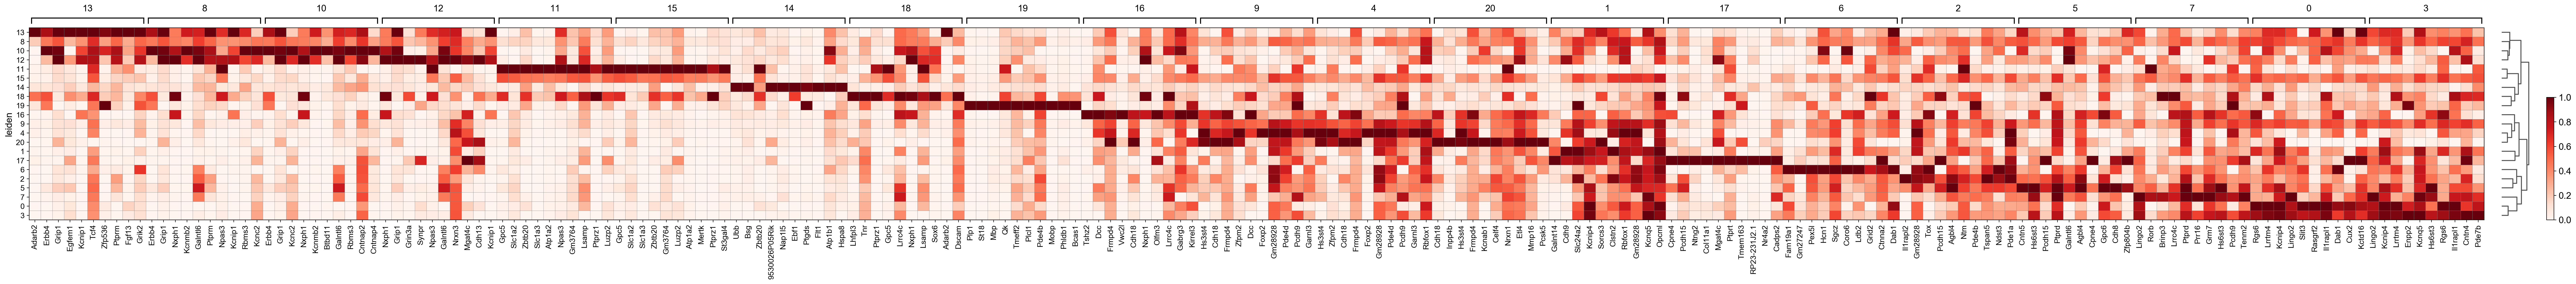

In [29]:
sc.pl.rank_genes_groups_matrixplot(adata_nuc, standard_scale='var', cmap='Reds')

## Read HDST MOB data

In [37]:
hdst = sc.read('../results/hdst.h5ad')
sc.pp.filter_cells(hdst, min_counts=1)
sc.pp.filter_genes(hdst, min_counts=1)
hdst

filtered out 756299 cells that have less than 1 counts


AnnData object with n_obs × n_vars = 118565 × 16208 
    obs: 'region', 'segment', 'n_counts'
    var: 'gene_symbols', 'gene_ids', 'n_counts'
    uns: 'region_colors'
    obsm: 'X_spatial'

### Split nucleus and non-nucleus based on segmentation results

In [38]:
hdst_nuc = hdst[hdst.obs.segment != '0'].copy()
hdst_nonnuc = hdst[hdst.obs.segment == '0'].copy()

sc.pp.filter_cells(hdst_nuc, min_counts=1)
sc.pp.filter_genes(hdst_nuc, min_counts=1)

sc.pp.filter_cells(hdst_nonnuc, min_counts=1)
sc.pp.filter_genes(hdst_nonnuc, min_counts=1)

filtered out 1273 genes that are detected in less than 1 counts
filtered out 3443 genes that are detected in less than 1 counts


In [39]:
sn_genes = adata_nuc.var_names.values
sc_genes = adata.var_names.values

hdst_nuc_genes = hdst_nuc.var_names.values
hdst_nonnuc_genes = hdst_nonnuc.var_names.values

gene_dict = {'sn': sn_genes,
             'hdst_nuc': hdst_nuc_genes,
             'hdst_nonnuc': hdst_nonnuc_genes,
             'sc': sc_genes}

In [40]:
genes = tables['mus_musculus-ensembl95-GRCm38']
genes = genes[genes.biotype == 'protein_coding']['gene_name'].values
genes

array(['Gnai3', 'Pbsn', 'Cdc45', ..., 'Ntn3', 'AC161166.1', 'AC117239.2'],
      dtype=object)

/Users/geraslan/.anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


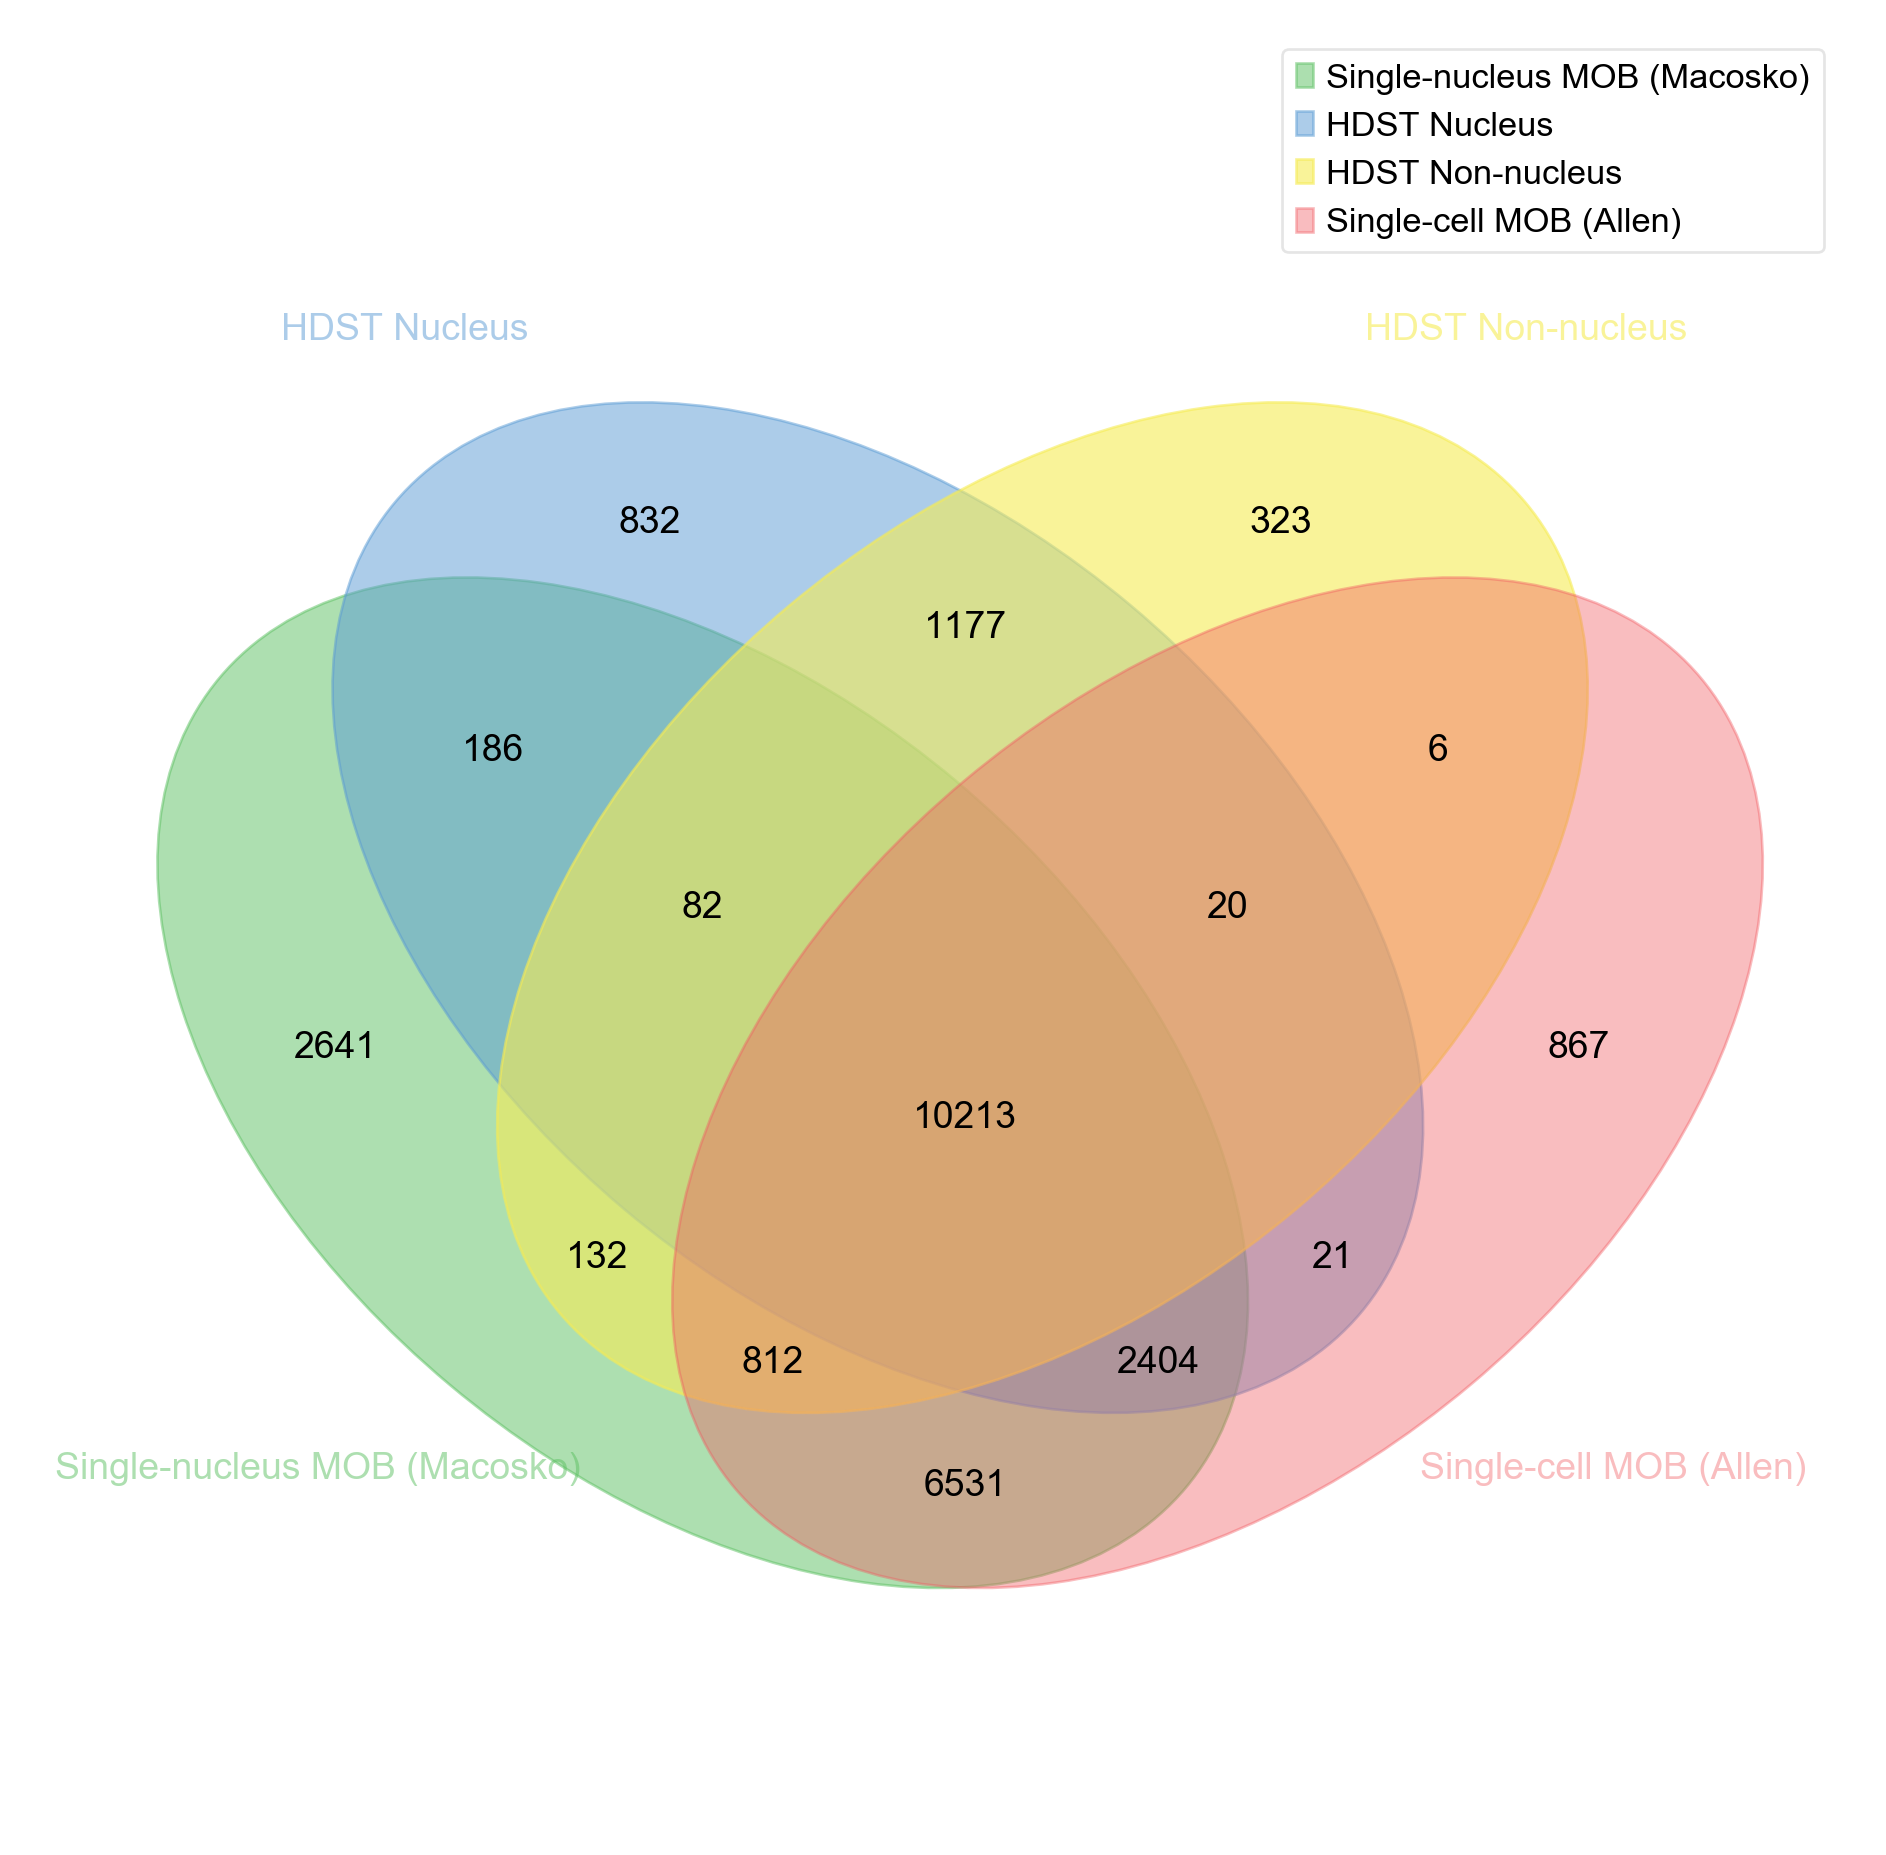

In [41]:
import venn

labels = venn.get_labels([sn_genes, hdst_nuc_genes, hdst_nonnuc_genes, sc_genes], fill=['number'])
fig, ax = venn.venn4(labels, names=['Single-nucleus MOB (Macosko)', 'HDST Nucleus', 'HDST Non-nucleus', 'Single-cell MOB (Allen)'])
fig.show()
fig.savefig('sc-sn-hdst-comparison-venn.pdf')

/Users/geraslan/.anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


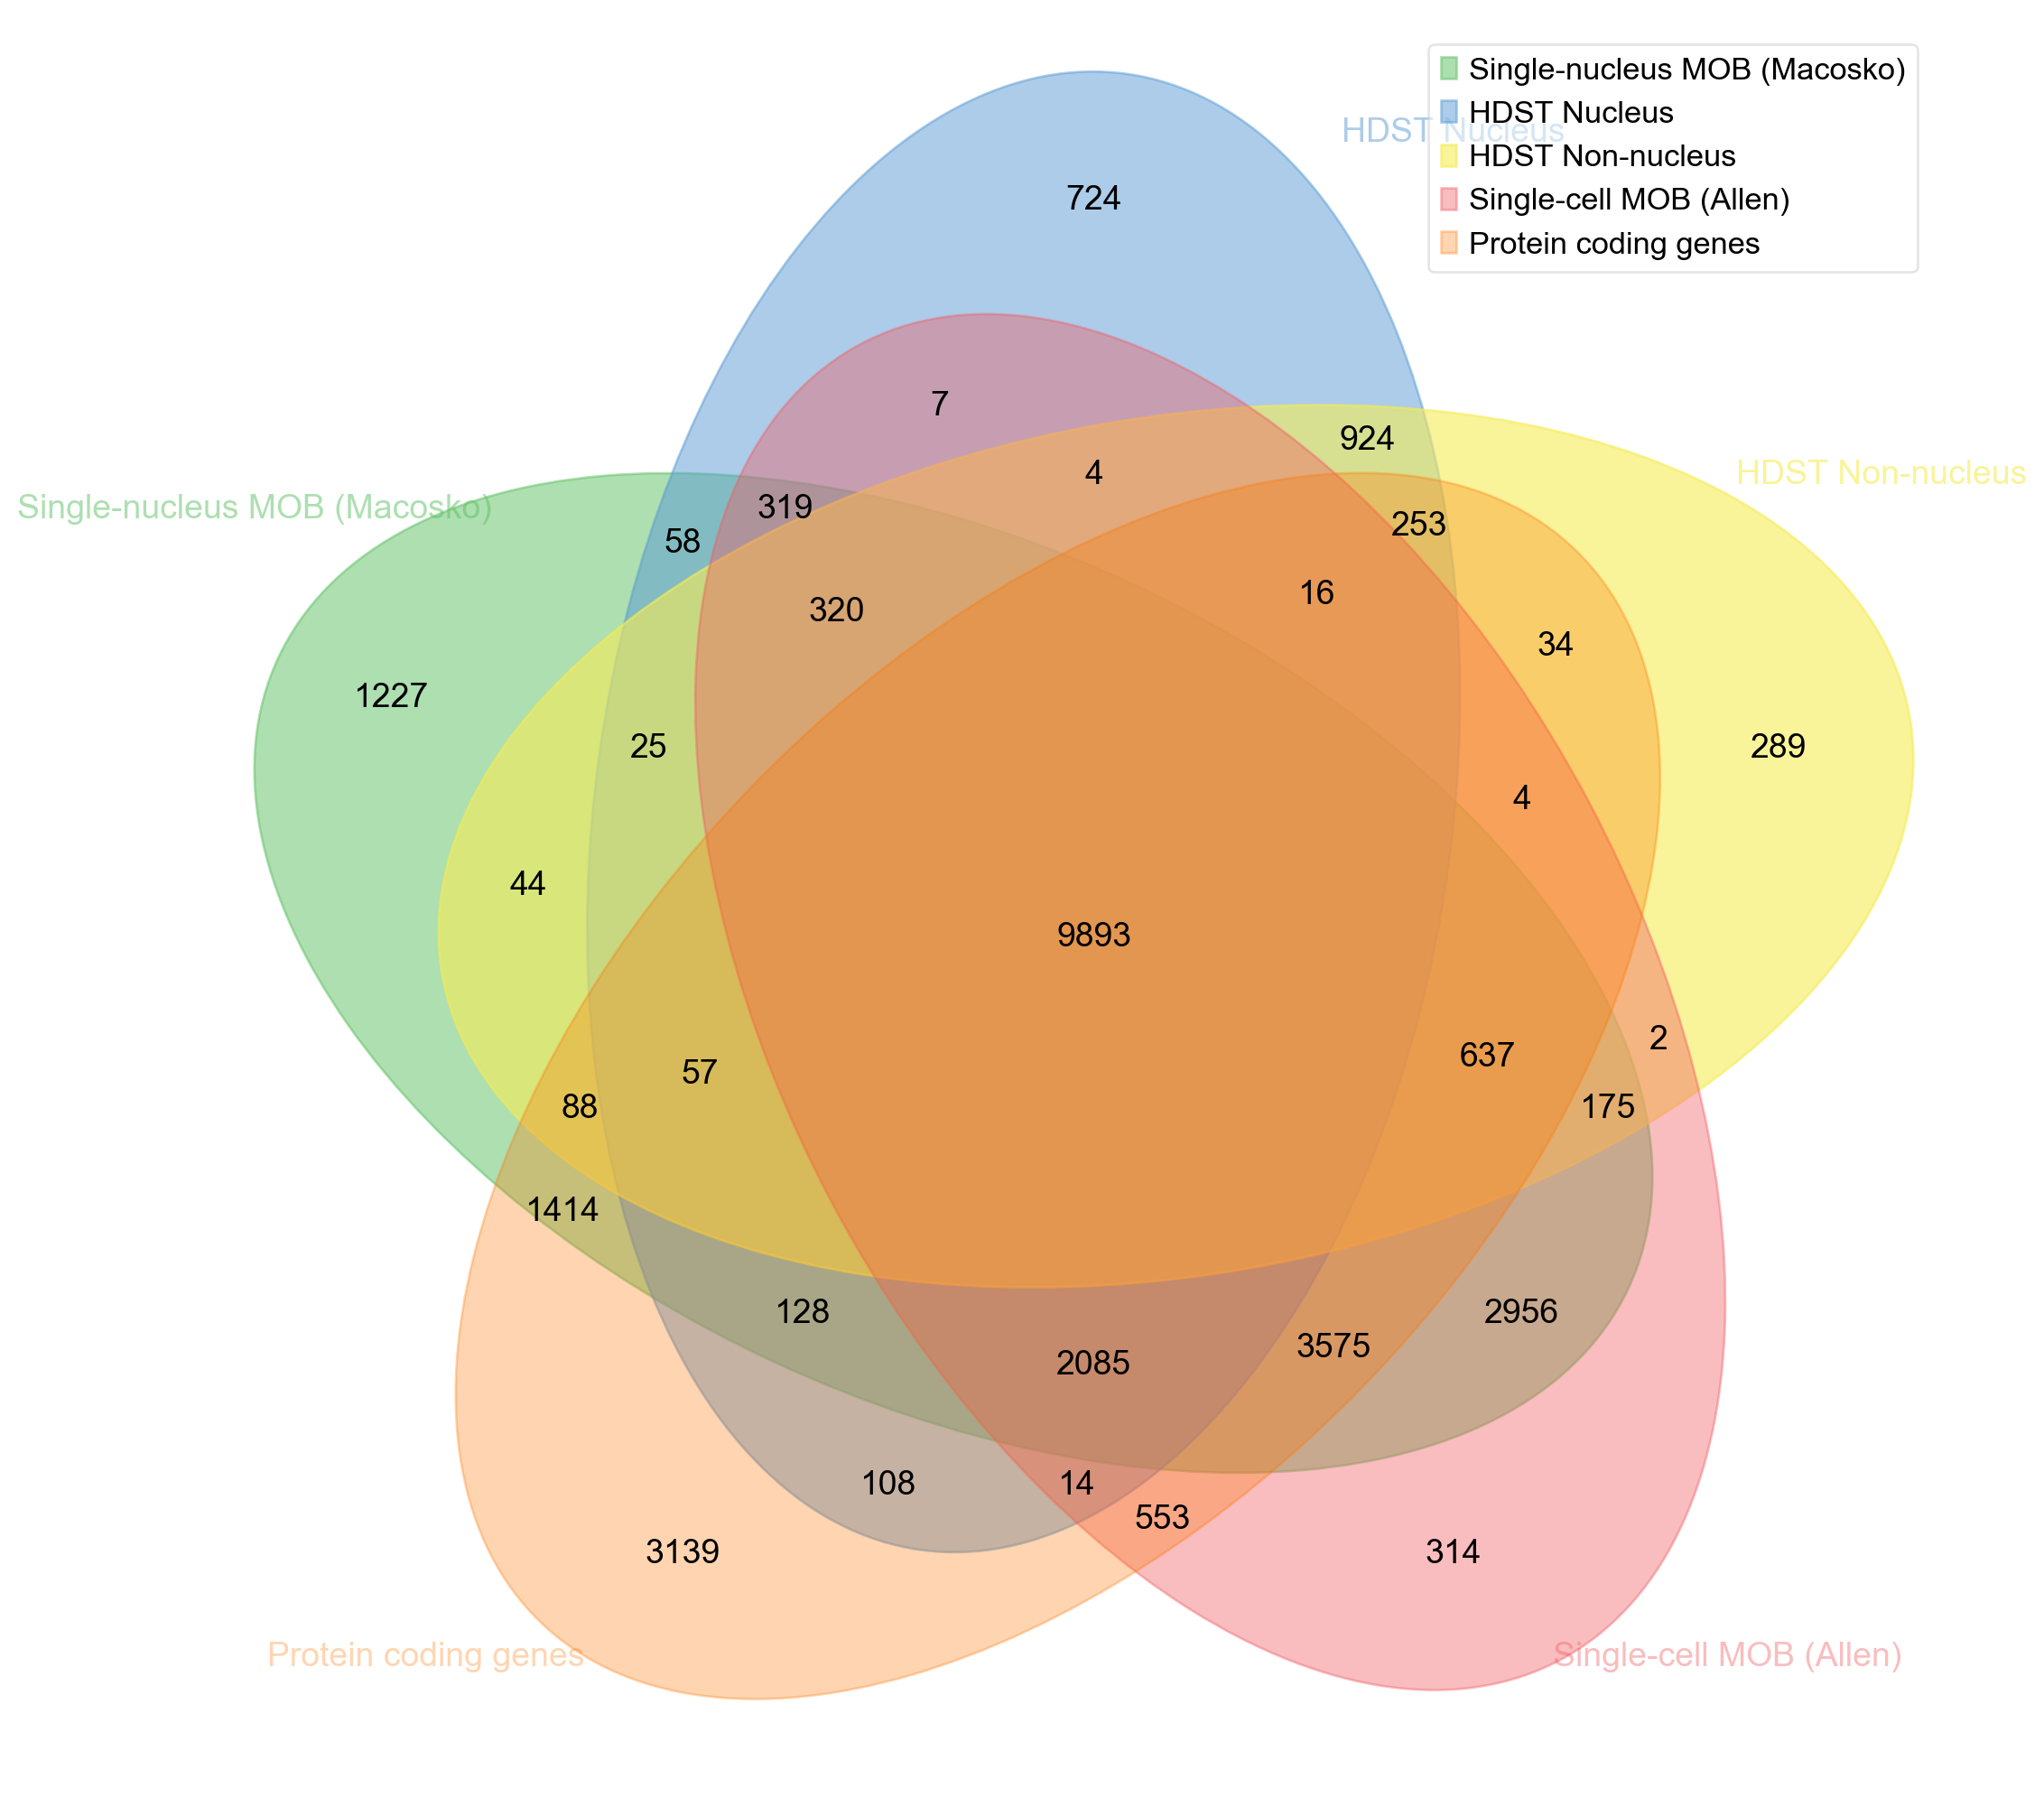

In [42]:
labels = venn.get_labels([sn_genes, hdst_nuc_genes, hdst_nonnuc_genes, sc_genes, genes], fill=['number'])
fig, ax = venn.venn5(labels, names=['Single-nucleus MOB (Macosko)', 'HDST Nucleus', 'HDST Non-nucleus', 'Single-cell MOB (Allen)', 'Protein coding genes'])
fig.show()
fig.savefig('sc-sn-hdst-comparison-venn.pdf')

In [43]:
hdst_protein_coding = np.array(sorted(list((set(hdst_nuc_genes) & set(genes)) - (set(hdst_nonnuc_genes) | set(sc_genes) | set(sn_genes)))))
hdst_protein_coding

array(['Abraxas2', 'Afg1l', 'Alkal2', 'Bicra', 'Bpifb6', 'Calhm5',
       'Castor1', 'Catsperz', 'Cavin2', 'Ccdc192', 'Ccdc9b', 'Cd300c2',
       'Cfap65', 'Cnmd', 'Colca2', 'Cst8', 'Cyren', 'Defb50', 'Deup1',
       'Dglucy', 'Dmrt3', 'Drc3', 'Eloa', 'Epp13', 'Fabp2', 'Fam241b',
       'Fam90a1a', 'Foxd3', 'Frmpd2', 'Gal3st2c', 'Gm10358', 'Gm17949',
       'Gm19935', 'Gm20931', 'Gm21953', 'Gm2888', 'Gm3099', 'Gm31371',
       'Gm35315', 'Gm38303', 'Gm44511', 'Gm44579', 'Gm44596', 'Gm44790',
       'Gm44973', 'Gm45021', 'Gm45140', 'Gm45234', 'Gm45871', 'Gm49368',
       'Gm5155', 'Gm5689', 'Gpat3', 'Gtsf2', 'Hdhd5', 'Hist1h2bq',
       'Hoxd8', 'Ifi209', 'Inava', 'Ints14', 'Iqcm', 'Jpt2', 'Kyat3',
       'Large2', 'Lipo3', 'Lnp1', 'Majin', 'Map3k21', 'Mfsd14a', 'Mindy4',
       'Mrln', 'Mrm3', 'Nat8f2', 'Nectin3', 'Nectin4', 'Nemp2', 'Nkapd1',
       'Olfr180', 'Olfr27', 'Olfr389', 'Olfr730', 'Olfr859', 'Olfr94',
       'Pcnx2', 'Rdh16f2', 'Resf1', 'Rflnb', 'Riox2', 'Rmc1', 'S100a9',
 

### Define interesting genes as those that are expressed in hdst-nuclei & single-nucleus but not in hdst-nonnuclei and single-cell

In [44]:
interesting_genes = np.array(sorted(list((set(sn_genes) & set(hdst_nuc_genes)) - (set(hdst_nonnuc_genes) | set(sc_genes)))))
interesting_genes

array(['1700001G01Rik', '1700003C15Rik', '1700012I11Rik', '1700012P22Rik',
       '1700026F02Rik', '1700065L07Rik', '1700128A07Rik', '2310043O21Rik',
       '4930412E21Rik', '4930554G24Rik', '4930557F10Rik', '4930578C19Rik',
       '4932414N04Rik', '4933427I22Rik', '4933436E23Rik', '4933436I20Rik',
       '9130015L21Rik', '9430069I07Rik', 'A630010A05Rik', 'A630073D07Rik',
       'Acer1', 'Apoc1', 'B230110G15Rik', 'Bcas1os2', 'Catsperb',
       'Ccdc7b', 'Ccl1', 'Cdk1', 'Cdrt4', 'Ceacam18', 'Ceacam5', 'Cfhr2',
       'Cldn34c2', 'Clec4b1', 'Clec4b2', 'Cpa3', 'Crisp4', 'Crp',
       'Cyp2c38', 'Cyp2c39', 'Cyp2c67', 'Cyp2j13', 'Cyp2j8', 'Cyp3a25',
       'Cyp3a59', 'D530049I02Rik', 'D830032E09Rik', 'D930032P07Rik',
       'E330010L02Rik', 'Enpp3', 'Esrp1', 'F830045P16Rik', 'Fam205a4',
       'Frem3', 'G6pd2', 'Galp', 'Gata1', 'Gbp8', 'Gc', 'Glp1r',
       'Gm11042', 'Gm11077', 'Gm11548', 'Gm11917', 'Gm12022', 'Gm12132',
       'Gm12472', 'Gm12606', 'Gm12756', 'Gm12869', 'Gm13941', 'Gm1406

In [45]:
genes = tables['mus_musculus-ensembl95-GRCm38'].set_index('gene_name')
interesting_df = genes.loc[interesting_genes]
interesting_df

,contig,start,end,strand,biotype
gene_name,,,,,
1700001G01Rik,18,17019051,17137559,+,lincRNA
1700003C15Rik,5,11689253,11769308,-,lincRNA
1700012I11Rik,15,67226769,67377094,+,lincRNA
1700012P22Rik,4,144418189,144438772,-,protein_coding
1700026F02Rik,8,70948246,71085758,-,lincRNA
1700065L07Rik,6,73436986,73471021,-,lincRNA
1700128A07Rik,14,106417187,106486520,-,lincRNA
2310043O21Rik,15,38549343,38594934,-,lincRNA
4930412E21Rik,3,23461050,23521398,+,lincRNA


In [52]:
interesting_df.to_excel('hdst-exclusive-genes.xls')
interesting_df[interesting_df.index.duplicated()]

,contig,start,end,strand,biotype
gene_name,,,,,
Fam205a4,GL456350.1,144079,149877,-,protein_coding


In [47]:
interesting_df.biotype = interesting_df.biotype.astype('category')
interesting_df.biotype.value_counts()

protein_coding    129
lincRNA            43
antisense          15
Name: biotype, dtype: int64

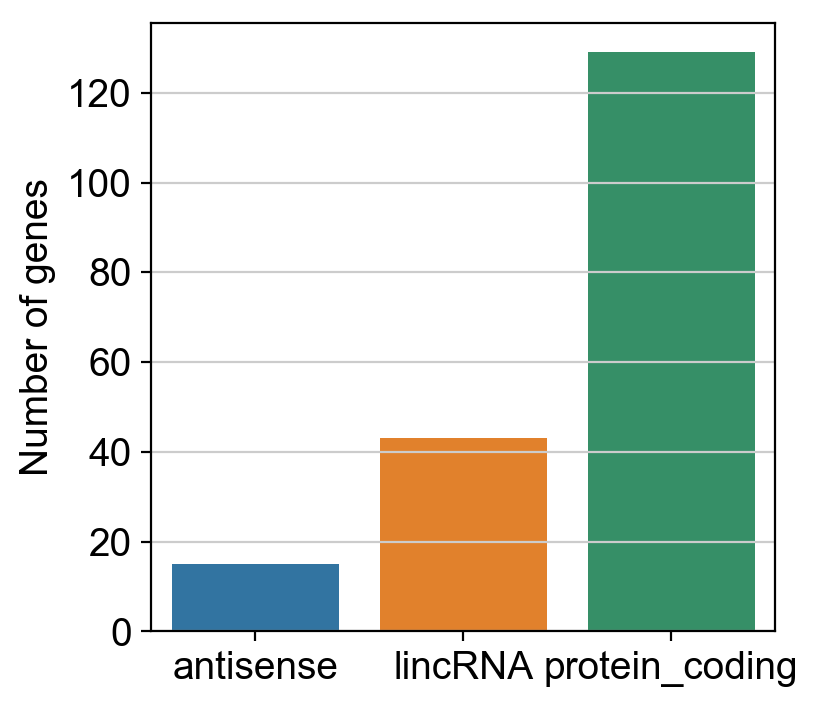

In [63]:
f = sns.countplot(x='biotype', data=interesting_df)
plt.xlabel('')
plt.ylabel('Number of genes')
f.get_figure().savefig('hdst-sn-gene-biotypes.pdf')